In [1]:
import cv2 as cv
import os
import sys
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
binaries_path = sorted(glob("./binarycovs/*.npy"))
binaries = np.array([np.load(path) for path in binaries_path])

In [3]:
y_train=[]
y=[]
x=[]
for i in range(len(binaries_path)):
    x.append(binaries[i])
    y.append(int(binaries_path[i].split('.')[-2][-1]))

x = np.array(x)
y = np.array(y)

In [4]:
xi = []
for i in range(len(x)):
    xi.append([])
    for j in range(len(x[i])):
        xi[i].append(x[i][j].flatten())

In [6]:
total=[]
for i in range(len(binaries)):
    for j in range(len(binaries[i])):
        total.append(binaries[i][j].flatten())

In [55]:
from sklearn.cluster import KMeans
estimator=KMeans(n_clusters=32000).fit(total)
dictionary=estimator.cluster_centers_


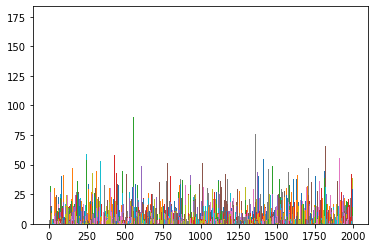

In [56]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

topr=[]
for i in range(len(binaries)):
    temp1,temp2=pairwise_distances_argmin_min(xi[i],dictionary,metric='euclidean')
    histogram_vid=plt.hist(temp1,bins=len(dictionary))
    topr.append(histogram_vid[0])
    
dataset_train2=np.array(topr)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(dataset_train2,y, test_size=0.2, shuffle=True)

In [166]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
RF_est = RandomForestClassifier(n_estimators=50,max_depth=20)
SV_est = SVC(C=50,kernel='linear')
KN_est = KNeighborsClassifier(n_neighbors=10)

## K neighbor

0.08333333333333333


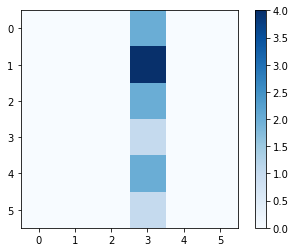

In [70]:
KN_est.fit(x_train, y_train)
KN_pr = KN_est.predict(x_test)
print(KN_est.score(x_test, y_test))
cm_test1 = confusion_matrix(y_test, KN_pr)
plt.imshow(cm_test1, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

## GaussianNB

0.4166666666666667


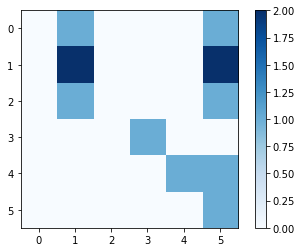

In [60]:
GN_est.fit(x_train, y_train)
GN_pr = GN_est.predict(x_test)
print (GN_est.score(x_test, y_test))
cm_test2 = confusion_matrix(y_test, GN_pr)

plt.imshow(cm_test2, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();



## Random Forest

0.3333333333333333


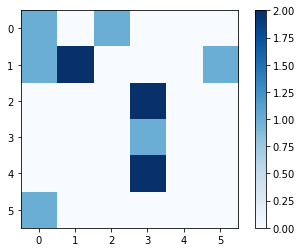

In [176]:
RF_est.fit(x_train, y_train)
RF_pr = RF_est.predict(x_test)
print(RF_est.score(x_test, y_test))
cm_test3 = confusion_matrix(y_test, RF_pr)

plt.imshow(cm_test3, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

## Support Vector Macine

0.25


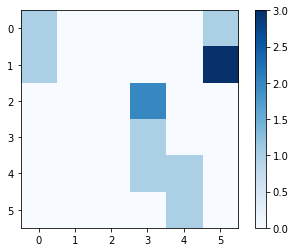

In [77]:
SV_est.fit(x_train, y_train)
SV_pr = SV_est.predict(x_test)
print (SV_est.score(x_test, y_test))
cm_test4 = confusion_matrix(y_test, SV_pr)

plt.imshow(cm_test4, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();
